In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [3]:
!nvidia-smi

Thu Jul  7 18:21:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import torch
torch.__version__

'1.11.0+cu113'

In [5]:
!pip install fastai==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import fastai
fastai.__version__

'2.6.3'

In [7]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [13]:
#! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:12<00:00, 66.8MB/s]
100% 2.70G/2.70G [01:12<00:00, 39.9MB/s]


In [20]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [21]:
data_path='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [26]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)

tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item, 
                                    batch_tmfs=tfms_for_batch, valid_pct=0.15, shuffle=True)

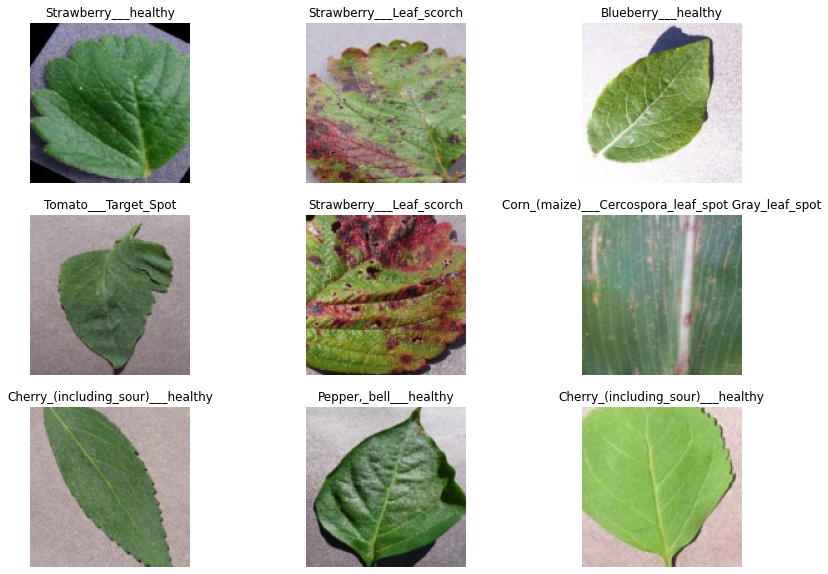

In [30]:
data.show_batch(figsize=(14,10))

In [31]:
print('Number of classes', data.c)

Number of classes 38


In [32]:
model=cnn_learner(data,resnet34, metrics=accuracy, model_dir='tmp/model/')

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.002511886414140463)

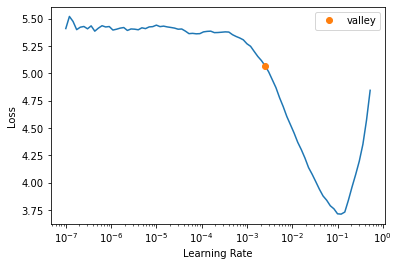

In [33]:
model.lr_find()

In [35]:
model.fit_one_cycle(5,0.0025)

epoch,train_loss,valid_loss,accuracy,time
0,0.284042,0.139336,0.954780,01:53
1,0.170084,0.078002,0.973596,01:53
2,0.110755,0.035146,0.987709,01:52
3,0.071523,0.022944,0.992640,01:52
4,0.064243,0.019096,0.993703,01:52


In [36]:
model.save('my_model.pkl')

Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/tmp/model/my_model.pkl.pth')

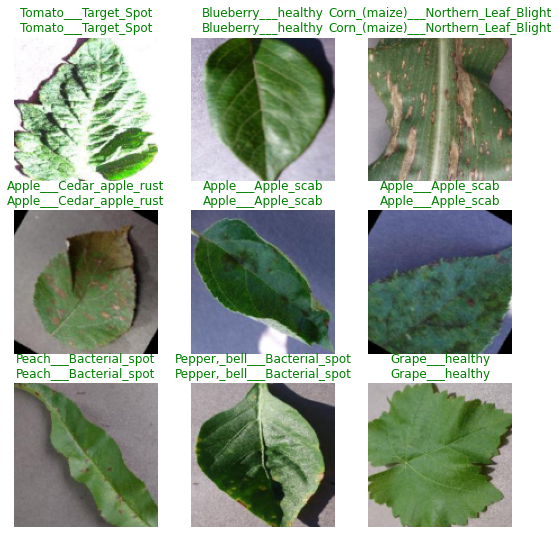

In [37]:
model.show_results()

In [39]:
interpretation = Interpretation.from_learner(model)

In [44]:
interp2=ClassificationInterpretation.from_learner(model)

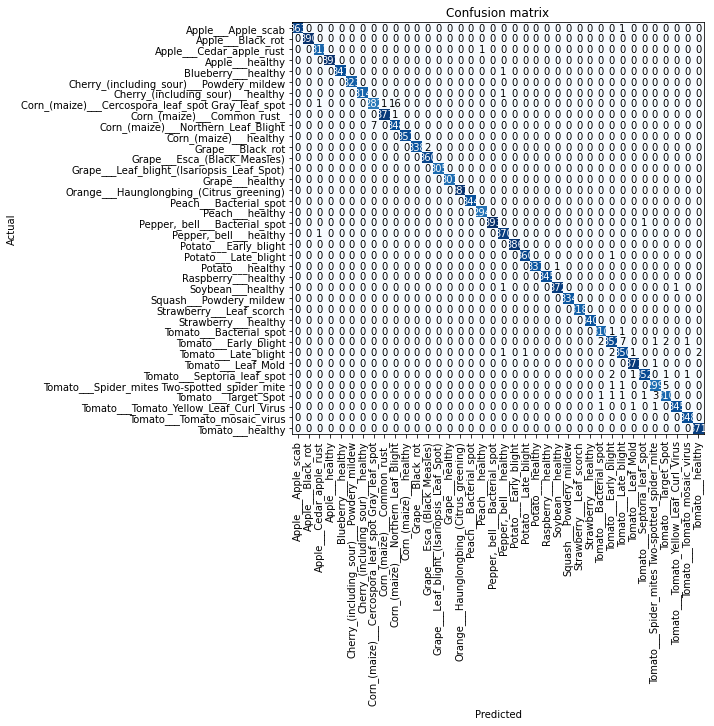

In [45]:
interp2.plot_confusion_matrix(figsize=(15,10))

In [48]:
interp2.most_confused(min_val=2)

[('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  16),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  7),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 7),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 5),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 3),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 2),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 2),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 2),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 2),
 ('Tomato___Late_blight', 'Tomato___healthy', 2),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 2)]